In [8]:
import numpy as np

In [4]:
import pandas as pd
dat_wine=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
           'wine/wine.data',header=None)

In [38]:
dat_wine.head()
print(dat_wine.shape)

(178, 14)


In [6]:
dat_wine.columns=['class label','alchohol','malic acid','ash','alcalinity of ash','magnesium','total phenols','flavanoids','nonflavanoid phenols','proanthocyanins','color intensity','hue','OD208','proline']

In [9]:
print('class label:',np.unique(dat_wine['class label']))

class label: [1 2 3]


In [10]:
dat_wine.head()

,class label,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
from sklearn.model_selection import train_test_split
X,y=dat_wine.iloc[:,1:].values,dat_wine.iloc[:,0].values

In [73]:
X_train ,X_test, y_train, y_test=train_test_split(X,y,test_size=.3,random_state=1,stratify=y)

In [74]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(124, 13) (54, 13) (124,) (54,)


In [114]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cld=LinearDiscriminantAnalysis(store_covariance=True)
cld.fit(X_train,y_train)
y_train_pred=cld.predict(X_train)
y_test_pred=cld.predict(X_test)
from sklearn.metrics import accuracy_score
print('LDA train:',accuracy_score(y_train,y_train_pred))
print('LDA test:',accuracy_score(y_test,y_test_pred))

LDA train: 1.0
LDA test: 0.9814814814814815


In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_test_pred))

[[18  0  0]
 [ 0 20  1]
 [ 0  0 15]]


In [115]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
cqd=QuadraticDiscriminantAnalysis(store_covariance=True)
cqd.fit(X_train,y_train)
y_train_pred=cqd.predict(X_train)
y_test_pred=cqd.predict(X_test)
from sklearn.metrics import accuracy_score
print('QDA train:',accuracy_score(y_train,y_train_pred))
print('QDA test:',accuracy_score(y_test,y_test_pred))

QDA train: 1.0
QDA test: 0.9629629629629629


In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_test_pred))

[[18  0  0]
 [ 1 20  0]
 [ 0  1 14]]


In [116]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_train_pred=gnb.predict(X_train)
y_test_pred=gnb.predict(X_test)
print('GNB train:',accuracy_score(y_train,y_train_pred))
print('GNB test:',accuracy_score(y_test,y_test_pred))

GNB train: 0.9919354838709677
GNB test: 0.9814814814814815


In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_test_pred))

[[17  1  0]
 [ 0 21  0]
 [ 0  0 15]]


numpy.ndarray

In [142]:

df_y_train=pd.DataFrame(y_train,columns=['class_label'])
df_train=pd.concat([df_y_train,df_X_train],axis=1)
df_train_1=df_train.loc[df_train.class_label==1,:]
df_train_2=df_train.loc[df_train.class_label==2,:]
df_train_3=df_train.loc[df_train.class_label==3,:]



In [151]:
df_train_1=df_train_1.drop(['class_label'],axis=1)
df_train_2=df_train_2.drop(['class_label'],axis=1)
df_train_3=df_train_3.drop(['class_label'],axis=1)

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix=df_train_1.corr()
corrMatrix

,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
alchohol,1.000000,0.022056,-0.051368,-0.319601,0.163142,0.560636,0.566147,0.108557,0.375572,0.423354,0.180094,-0.001137,0.385181
malic acid,0.022056,1.000000,0.028630,-0.061802,0.094803,-0.073917,-0.143230,-0.239725,0.023466,-0.226634,-0.355674,0.253121,-0.372468
ash,-0.051368,0.028630,1.000000,0.378269,0.346318,0.047363,-0.059402,0.372649,-0.205896,-0.108500,0.206302,-0.028134,-0.083957
alcalinity of ash,-0.319601,-0.061802,0.378269,1.000000,0.140571,-0.282699,-0.365167,0.172659,-0.264276,-0.199641,0.099639,-0.064744,-0.085694
magnesium,0.163142,0.094803,0.346318,0.140571,1.000000,0.309757,0.087396,0.221365,-0.150442,0.234254,-0.127957,-0.053901,-0.108230
total phenols,0.560636,-0.073917,0.047363,-0.282699,0.309757,1.000000,0.774702,0.064031,0.341677,0.647159,-0.183717,0.042619,0.387109
flavanoids,0.566147,-0.143230,-0.059402,-0.365167,0.087396,0.774702,1.000000,-0.015143,0.512972,0.768323,0.057599,-0.126125,0.473431
nonflavanoid phenols,0.108557,-0.239725,0.372649,0.172659,0.221365,0.064031,-0.015143,1.000000,-0.167221,-0.061437,0.476395,-0.402018,0.019963
proanthocyanins,0.375572,0.023466,-0.205896,-0.264276,-0.150442,0.341677,0.512972,-0.167221,1.000000,0.467635,0.139290,-0.058014,0.225055
color intensity,0.423354,-0.226634,-0.108500,-0.199641,0.234254,0.647159,0.768323,-0.061437,0.467635,1.000000,0.027105,-0.261360,0.629912


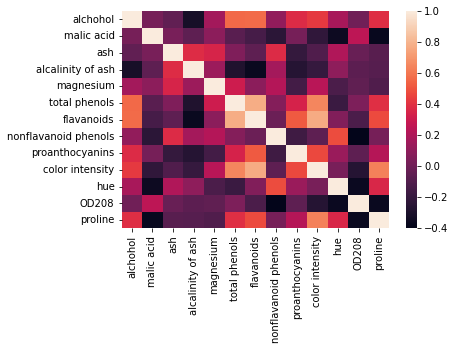

In [156]:
sns.heatmap(corrMatrix, annot=False)
plt.show()

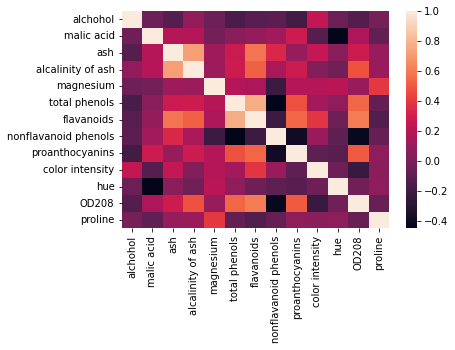

In [158]:
corrMatrix=df_train_2.corr()
corrMatrix
sns.heatmap(corrMatrix, annot=False)
plt.show()

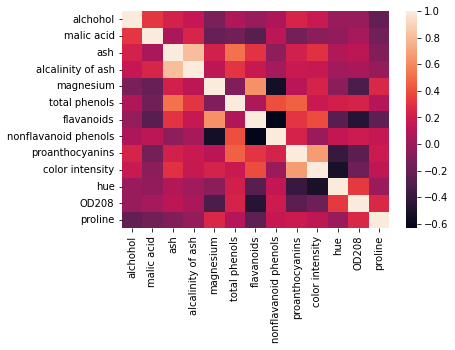

In [159]:
corrMatrix=df_train_3.corr()
corrMatrix
sns.heatmap(corrMatrix, annot=False)
plt.show()

In [154]:
import scipy.stats as stats

p_val=[]

for i in range(len(np.transpose(df_train_1))):
    p_val.append(stats.shapiro(df_train_1[:,i])[1])

print(p_val)

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [97]:
p_val

[0.03398112207651138,
 3.6677700876452946e-08,
 0.1283557415008545,
 0.21873746812343597,
 0.0004930422292090952,
 0.014316611923277378,
 0.000542028050404042,
 0.0017358337063342333,
 0.044210344552993774,
 4.005487426184118e-05,
 0.14237765967845917,
 2.689367647690233e-05,
 1.0653970093699172e-05]

In [99]:
for i in range(len(p_val)):
    if p_val[i]<0.05:
        print(i,'변수는 정규성 만족하지 않음')
    else:
        print(i,'변수는 정규성 만족')

0 변수는 정규성 만족하지 않음
1 변수는 정규성 만족하지 않음
2 변수는 정규성 만족
3 변수는 정규성 만족
4 변수는 정규성 만족하지 않음
5 변수는 정규성 만족하지 않음
6 변수는 정규성 만족하지 않음
7 변수는 정규성 만족하지 않음
8 변수는 정규성 만족하지 않음
9 변수는 정규성 만족하지 않음
10 변수는 정규성 만족
11 변수는 정규성 만족하지 않음
12 변수는 정규성 만족하지 않음


In [103]:
df_X_train.aggregate([np.var])

,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
var,0.65554,1.308746,0.075635,11.787941,175.859953,0.398542,1.0404,0.016589,0.312069,5.517994,0.052521,0.512724,102627.897718


In [104]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [107]:
df_X_train_std=pd.DataFrame(X_train_std,columns=['alchohol','malic acid','ash','alcalinity of ash','magnesium','total phenols','flavanoids','nonflavanoid phenols','proanthocyanins','color intensity','hue','OD208','proline'])
df_X_train_std.aggregate([np.var])

,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
var,1.00813,1.00813,1.00813,1.00813,1.00813,1.00813,1.00813,1.00813,1.00813,1.00813,1.00813,1.00813,1.00813


In [110]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cld=LinearDiscriminantAnalysis(store_covariance=True)
cld.fit(X_train_std,y_train)
y_train_pred=cld.predict(X_train_std)
y_test_pred=cld.predict(X_test_std)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

1.0
0.9814814814814815


In [113]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
cqd=QuadraticDiscriminantAnalysis(store_covariance=True)
cqd.fit(X_train_std,y_train)
y_train_pred=cqd.predict(X_train_std)
y_test_pred=cqd.predict(X_test_std)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

1.0
0.9629629629629629
